In [10]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

You have 8,982 training examples and 2,246 test examples:

In [14]:
print(len(train_data))
print(len(test_data))

print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Decode it back to words

In [21]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_newswire)
print(train_labels[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


Vectorize the data

In [24]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use 
one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding.one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [25]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

NOTE THAT WE CAN USE BLOCK 4 OR INSTEAD 5 TO DO VECTORISATION OF THE TRAINING DATA

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

A new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.Each layer can only access information present in the output of the previous layer.If one layer drops some information
relevant to the classification problem, this information can never be recovered by later
layers: each layer can potentially become an information bottleneck.In previous IMDB rating example we took 16 hidden units,but now lets take 64 units.

There are two other things you should note about this architecture:


 You end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.


 The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

In [29]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution
output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output something
as close as possible to the true labels.

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [32]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 606us/step - loss: 2.6747 - accuracy: 0.5387 - val_loss: 1.7681 - val_accuracy: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4405 - accuracy: 0.7041 - val_loss: 1.3325 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0613 - accuracy: 0.7690 - val_loss: 1.1576 - val_accuracy: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.8357 - accuracy: 0.8186 - val_loss: 1.0485 - val_accuracy: 0.7780
Epoch 5/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.6696 - accuracy: 0.8568 - val_loss: 0.9737 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5352 - accuracy: 0.8882 - val_loss: 0.9455 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 161us/step - loss

Let’s train the network for 20 epochs.

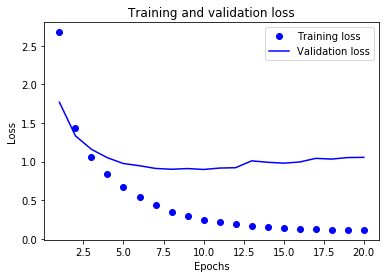

In [34]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

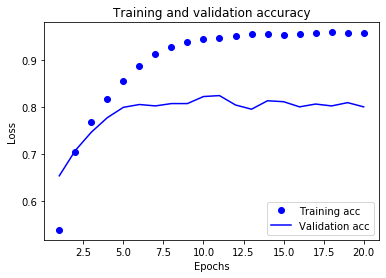

In [38]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 158us/step - loss: 2.5704 - accuracy: 0.5352 - val_loss: 1.6659 - val_accuracy: 0.6410
Epoch 2/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.3659 - accuracy: 0.7140 - val_loss: 1.2734 - val_accuracy: 0.7260
Epoch 3/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.0277 - accuracy: 0.7761 - val_loss: 1.1264 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.8163 - accuracy: 0.8256 - val_loss: 1.0220 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.6492 - accuracy: 0.8622 - val_loss: 0.9452 - val_accuracy: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.5173 - accuracy: 0.8935 - val_loss: 0.9279 - val_accuracy: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.414

In [40]:
results

[1.0030708017884251, 0.7911843061447144]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [42]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1923419412288513

You can verify that the predict method of the model instance returns a probability
distribution over all 46 topics. Let’s generate topic predictions for all of the test data.

In [43]:
predictions = model.predict(x_test)

In [44]:
predictions[0].shape

(46,)

In [45]:
np.sum(predictions[0])

0.99999964

In [46]:
np.argmax(predictions[0])

3